B

In [66]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import int64

import requests
import IPython.display as Disp

import sklearn
from sklearn.decomposition import TruncatedSVD

In [67]:
books_df = pd.read_csv(r"C:\Users\admin\Desktop\recommendation_engine_project\templates\data_Set\books.csv")
ratings_df = pd.read_csv(r"C:\Users\admin\Desktop\recommendation_engine_project\templates\data_Set\ratings_algorithm.csv", encoding='UTF-8',  dtype={'user_id': int,'book_id':int, 'rating':int} )

In [68]:
books_df.head()
#ratings_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,...,eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,...,en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [69]:
books_df.describe()
books_df_2 = books_df[['book_id', 'books_count', 'original_publication_year', 'average_rating','original_title','authors']]

books_df_2.head()

len(books_df)

10000

<AxesSubplot:>

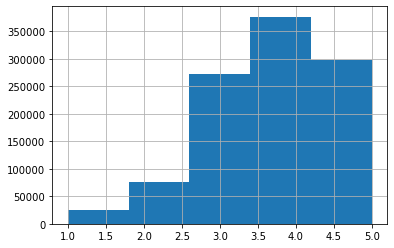

In [70]:
ratings_df.rating.hist(bins=5)

In [71]:
ratings_df.describe()

,user_id,book_id,rating
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,7.501611e+03,1.742429e+03,3.806920e+00
std,4.552901e+03,2.338151e+03,1.005755e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.565000e+03,1.330000e+02,3.000000e+00
50%,7.358000e+03,6.500000e+02,4.000000e+00
75%,1.111000e+04,2.415000e+03,5.000000e+00
max,4.220800e+04,1.000000e+04,5.000000e+00


In [72]:
ratings_df.groupby('user_id')['rating'].count()

user_id
1         91
2         11
3         91
4        134
6          1
        ... 
22351     30
24420     19
37076     80
41961      9
42208     36
Name: rating, Length: 13123, dtype: int64

In [73]:
combined_books_df = pd.merge(ratings_df, books_df, on='book_id')

In [74]:
combined_books_df.head()

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,258,5,1232,1232,3209783,279,143034901,9.780000e+12,"Carlos Ruiz Zafón, Lucia Graves",...,eng,4.24,263685,317554,24652,4789,11769,42214,101612,157170
1,11,258,3,1232,1232,3209783,279,143034901,9.780000e+12,"Carlos Ruiz Zafón, Lucia Graves",...,eng,4.24,263685,317554,24652,4789,11769,42214,101612,157170
2,143,258,4,1232,1232,3209783,279,143034901,9.780000e+12,"Carlos Ruiz Zafón, Lucia Graves",...,eng,4.24,263685,317554,24652,4789,11769,42214,101612,157170
3,242,258,5,1232,1232,3209783,279,143034901,9.780000e+12,"Carlos Ruiz Zafón, Lucia Graves",...,eng,4.24,263685,317554,24652,4789,11769,42214,101612,157170
4,325,258,4,1232,1232,3209783,279,143034901,9.780000e+12,"Carlos Ruiz Zafón, Lucia Graves",...,eng,4.24,263685,317554,24652,4789,11769,42214,101612,157170


In [75]:
combined_books_df.groupby('book_id')['rating'].count().sort_values(ascending=False)

book_id
2       4937
26      4725
4       4651
18      4335
23      4329
        ... 
3226       1
6969       1
9781       1
3230       1
3931       1
Name: rating, Length: 7774, dtype: int64

In [76]:
Filter = combined_books_df['book_id'] < 10
combined_books_df[Filter]['title'].unique()
#printBookCover(Filter)

array(["Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
       'The Great Gatsby', 'The Catcher in the Rye',
       'Angels & Demons  (Robert Langdon, #1)', 'To Kill a Mockingbird',
       'The Hobbit', 'Twilight (Twilight, #1)',
       'The Hunger Games (The Hunger Games, #1)',
       'The Fault in Our Stars'], dtype=object)

In [ ]:
ct_df = combined_books_df.pivot_table(values='rating', index='user_id', columns='title', fill_value=0)

In [ ]:
ct_df.head()

In [ ]:
X = ct_df.values.T
X.shape
print(X)

In [ ]:
SVD  = TruncatedSVD(n_components=20, random_state=17)
result_matrix = SVD.fit_transform(X)
result_matrix.shape
print(result_matrix)

In [ ]:
corr_mat = np.corrcoef(result_matrix)
corr_mat.shape

In [ ]:
book_names = ct_df.columns
book_list = list(book_names)
hunger_game_index = book_list.index('To Kill a Mockingbird')

In [ ]:
corr_mockingbird = corr_mat[hunger_game_index]
corr_mockingbird.shape

In [ ]:
list(book_names[(corr_mockingbird<1.0) & (corr_mockingbird>0.8)])